CodeAlpha - Iris Flower Classification


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
iris = load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['species']=iris.target
df['species']=df['species'].map({0:'setosa',1:'versicolor',2:'verginica'})

In [8]:
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<function matplotlib.pyplot.show(close=None, block=None)>

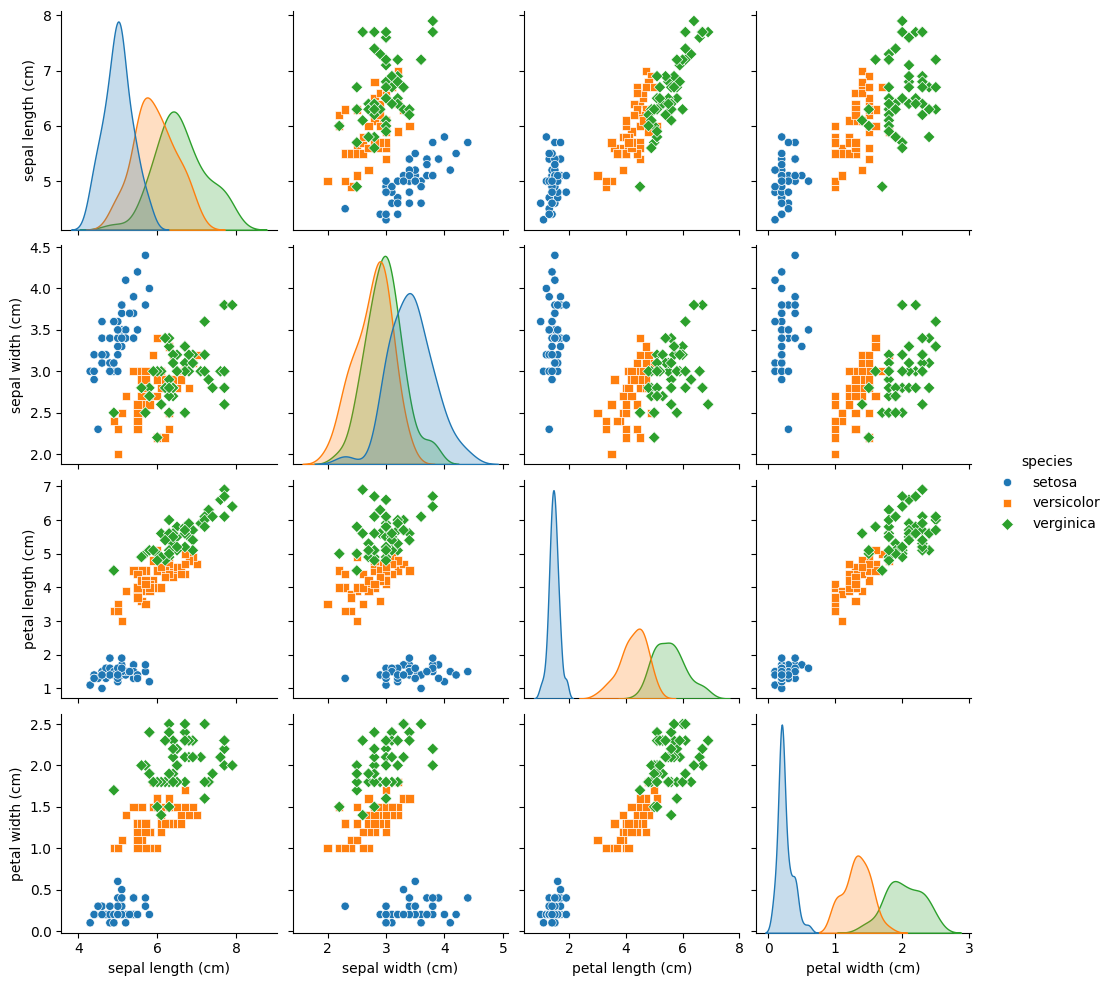

In [10]:
sns.pairplot(df,hue="species",markers=["o","s","D"])
plt.show

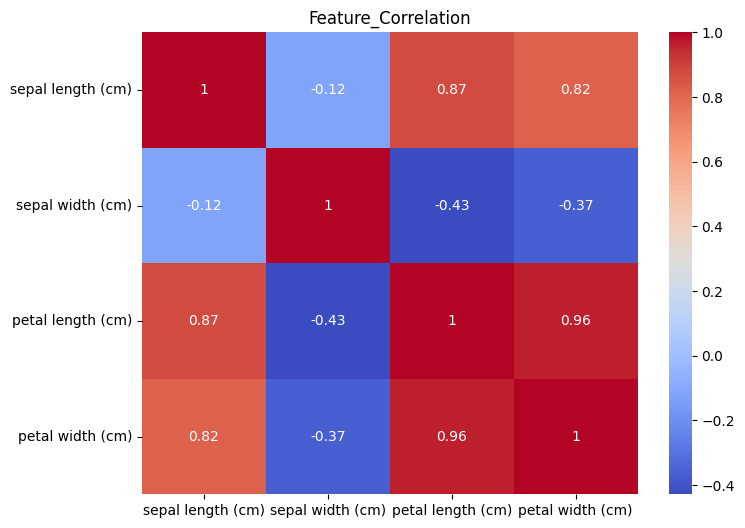

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:,:-1].corr(),annot=True,cmap='coolwarm')
plt.title("Feature_Correlation")
plt.show()

In [12]:
X=df.iloc[:,:-1]
y=df["species"]

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_pred=model.predict(X_test)

In [17]:
print("\nAccuracy_Score",accuracy_score(y_test,y_pred))


Accuracy_Score 1.0


In [19]:
print("\nConfusion_Matrix")
print(confusion_matrix(y_test,y_pred))


Confusion_Matrix
[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]


In [20]:
print("\nClassification_Report")
print(classification_report(y_test,y_pred))


Classification_Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
   verginica       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



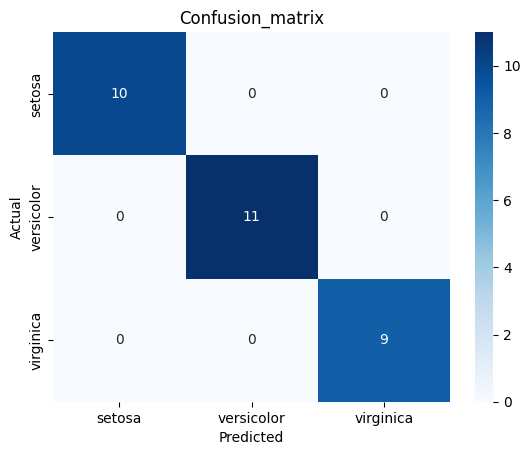

In [24]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion_matrix")
plt.show()